# STAT 481 CLASSIFICATION
# Ali Sameer Ali Alzenji 202107857
# Ebrahim Juma Alsawan 202009241

### Import necessary libraries

In [2]:
### for data loading and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###for train test split, decision trees, random forest, coconfusion matrix , and finally permutation importance
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier

### Task 1: Read data 
### Data source: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

In [4]:
### read data using pandas
df = pd.read_csv('loan_data.csv')
df
### the data consist of 45000 rows × 14 columns, as we can see some columns have
### categorical variables, we will change that in the next cell

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [5]:
### encode categorical data
data = pd.get_dummies(df, drop_first=True)
data
### we need to change categorical variables because most machine learning algorithms
### require numerical input to perform calculations. 
### they cannot directly process text data like "male" or "RENT."
### now the data consists of 45000 rows × 23 columns where the new columns represent the encoded categorical variables as numerical values.

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1,True,...,False,False,False,True,False,False,True,False,False,False
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1,False,...,False,False,False,True,False,True,False,False,False,False
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1,True,...,False,False,False,True,False,False,False,False,False,False
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1,True,...,False,False,False,True,True,False,False,False,False,False


#### Task 2: Dividing the columns into dependent variable and independent variables

In [7]:
### creating a variable having the dependent variable column(our target)
y = data['loan_status']
### creating a variable having the independent variable columns(our features)
x = data.drop('loan_status' , axis = 1)
#print the shape of y and x(the dependent and independent variables)
print(y.shape , '\n')
print(x.shape)

(45000,) 

(45000, 22)


#### Task 3: Split the data into training and testing

In [9]:
### spliting the data into train and test using sklearn splitting library, test size is 25% of the data
### random state insure that we get the same results when splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)
### prints the shape of the training set and testing set for x and y
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33750, 22)
(11250, 22)
(33750,)
(11250,)


#### Task 4: Create the decision tree classifier model

In [11]:
### decision Tree classifier object creation
tree_classifier = DecisionTreeClassifier()

### train the decision tree classifier
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
### predicting y values using the model and the x test data
y_pred = tree_classifier.predict(x_test)

### printing the predicted vales
print(y_pred)

[1 0 0 ... 0 0 0]


### task 5:  Evaluation of the accuracy

In [14]:
### the the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
### print the accuracy and round to one number
print("Accuracy:" , round(accuracy,1))
### the model correctly predicted 90% of the data

Accuracy: 0.9


Confusion Matrix:
[[8201  576]
 [ 578 1895]]


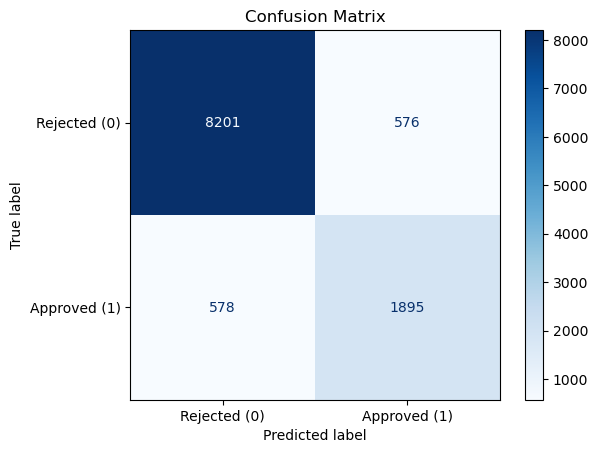

In [15]:
### creating the confusion matrix and print it
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

### create and display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
### true negatives: 8217
### false Positives: 560
### false negatives: 590
### true Positives: 1883

In [16]:
### Creating and printing the classification report
print("Classification report:")
print(classification_report(y_test, y_pred))
### from the report we can see that our model have an accuracy of 90%.
### and we can notice that the precision and recall for the "Rejected" class (0) are higher while the "Approved" class (1) has slightly lower values.

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8777
           1       0.77      0.77      0.77      2473

    accuracy                           0.90     11250
   macro avg       0.85      0.85      0.85     11250
weighted avg       0.90      0.90      0.90     11250



### task 6: random forest

In [18]:
### fit the training set using this method , with 150 individual decison tree
rf = RandomForestClassifier(n_estimators=150)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [19]:
### predict the respones for the test dataset and print the output
rf_preditc = rf.predict(x_test)
print(rf_preditc)

[1 0 0 ... 0 0 0]


### task 7: plot the feature importance

In [21]:
### feature importance based on the GINI index
rf.feature_importances_

array([0.03147372, 0.12159992, 0.02844347, 0.06145665, 0.15157415,
       0.16919968, 0.02588201, 0.05586626, 0.00805379, 0.00670304,
       0.00126315, 0.00628191, 0.00536113, 0.0005715 , 0.01010251,
       0.05248934, 0.00754247, 0.00891124, 0.00704238, 0.00640653,
       0.00815348, 0.22562167])

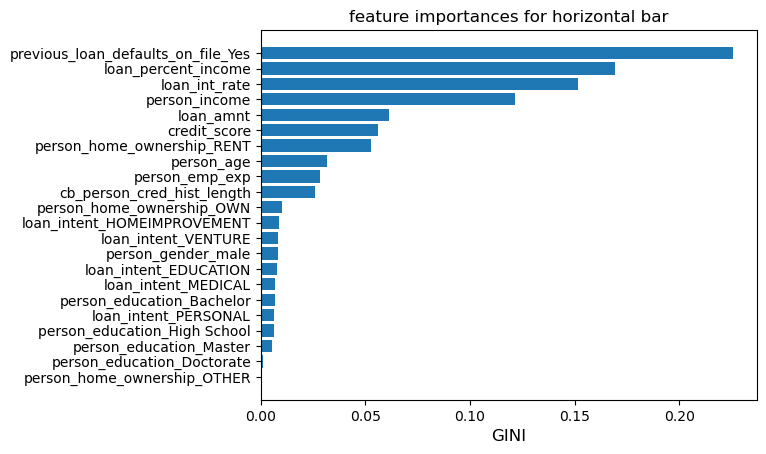

In [22]:
### sorting is not required but it was used to make the plot easy to read
sort_rf=rf.feature_importances_.argsort()
plt.figure()
plt.barh(rf.feature_names_in_[sort_rf],rf.feature_importances_[sort_rf])
plt.xlabel("GINI" , fontsize = 12)
plt.title("feature importances for horizontal bar")
plt.show()

In [23]:
### measure the accuracy drop when shuffling feature 30 time
PIMO = permutation_importance(rf,x_test,y_test,n_repeats=30,scoring="accuracy")
print("permutation importance results (accuracy drop")
print(PIMO.importances_mean)

permutation importance results (accuracy drop
[ 1.70370370e-03  2.80829630e-02  8.05925926e-04  2.72592593e-03
  5.26400000e-02  4.85629630e-02  5.83703704e-04  4.96296296e-03
 -1.60000000e-04 -2.66666667e-05  8.29629630e-05 -3.46666667e-04
  2.07407407e-04  1.68888889e-04  3.02222222e-03  2.36622222e-02
  2.78814815e-03  6.85333333e-03  9.95555556e-04  1.37777778e-03
  3.20888889e-03  9.95466667e-02]


### task8: plot the permutation importance

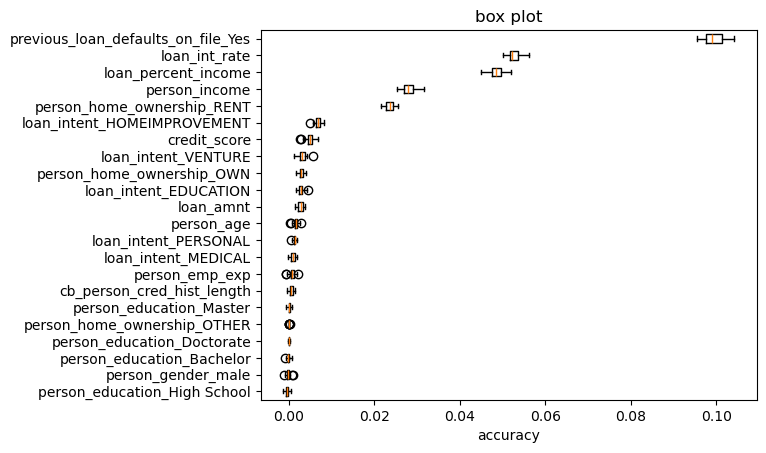

In [25]:
### sorting is not required but it was used to make the plot easy to read
sort = PIMO.importances_mean.argsort()
plt.figure()
plt.boxplot(PIMO.importances[sort].T ,vert=False , tick_labels=x.columns[sort])
plt.xlabel("accuracy")
plt.title("box plot")
plt.show()

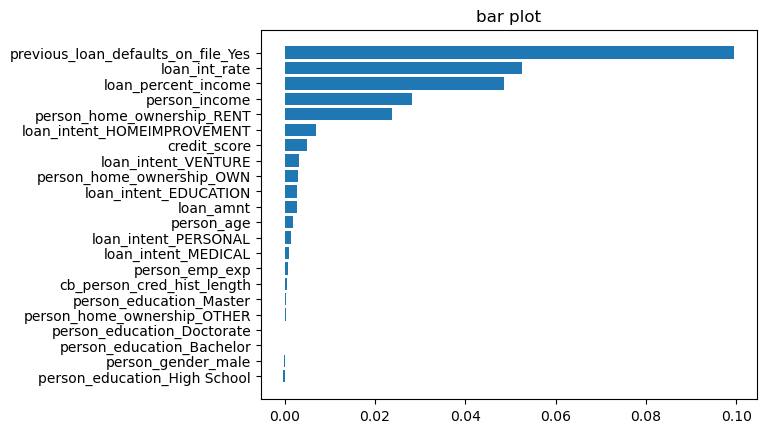

In [26]:
plt.figure()
plt.barh(x.columns[sort],PIMO.importances_mean[sort])
plt.title("bar plot")
plt.show()

### bounce and further work:

#### Comparative Analysis using Cross valadation 

In [29]:
### cross valadation was used beacuse it gives a more reliable estimate of the model true performance
### it can detect overfitting or underfitting more clearly
### and we can compare models more fairly
### import the cross valadation libarary
from sklearn.model_selection import cross_val_score
tree_CV_S = cross_val_score(tree_classifier,x,y,cv=5,scoring="accuracy")
rf_CV_S = cross_val_score(rf,x,y,cv=5,scoring="accuracy")
print("decision tree cross valadation:\n" , tree_CV_S)
print("mean accuracy:", round(tree_CV_S.mean(),4))
print("-----------------------------------------------")
print("random forest cross valadation:\n" , rf_CV_S)
print("mean accuracy:" , round(rf_CV_S.mean(),4))
### the decision tree has a mean of 89%
### and the random forest has a mean of 92%
### this tells us that the random forest is more accurate and stable
### and that the decision tree might be overfitted or underfitted in some folds

decision tree cross valadation:
 [0.88611111 0.89455556 0.88833333 0.89888889 0.90466667]
mean accuracy: 0.8945
-----------------------------------------------
random forest cross valadation:
 [0.92322222 0.92088889 0.91866667 0.92988889 0.93533333]
mean accuracy: 0.9256


### Comparative Analysis using ROC curve with some visualization 

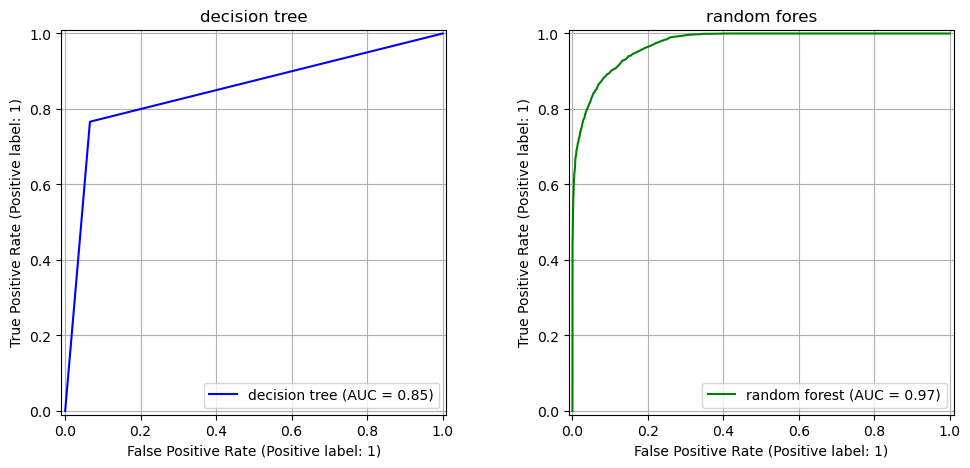

In [31]:
### we want to evalute how well our model separates btweeen two classes (eg. approved vs rejected loans)
### ROC is used to assess the overall performance of a test and to compare the performance of two or diagnostic tests
### import the ROC curve libarary
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
fig,axes=plt.subplots(1,2,figsize=(12,5))
RocCurveDisplay.from_estimator(tree_classifier,x_test,y_test,name="decision tree",color="blue",ax=axes[0])
axes[0].set_title("decision tree")
axes[0].grid(True)
RocCurveDisplay.from_estimator(rf,x_test,y_test,name="random forest",color="green",ax=axes[1])
axes[1].set_title("random fores")
axes[1].grid(True)
plt.show()
### the random forest outpreform the decision tree in AUC, the random forest has a near perfect score of 0.97
### meaning it is better at ranking positive VS negative cases
### this confirms that that the random forest generalizes better and separated classes more effectively